<a href="https://colab.research.google.com/github/Ridhiman27/DeepVision-Hub/blob/main/Malaria_Diagnosis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Normalization,Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization, Input
from tensorflow.keras.losses import MeanSquaredError,Huber, MeanAbsoluteError, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [3]:
dataset , dataset_info = tfds.load('malaria',with_info = True, as_supervised=True,shuffle_files = True, split = ['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteP627WA/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [4]:
def split(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  data_size = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO*data_size))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO * data_size))

  val_dataset = val_test_dataset.take(int(VAL_RATIO*data_size))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*data_size))

  return train_dataset, val_dataset, test_dataset


In [5]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

# dataset = tf.data.Dataset.range()

train_dataset, val_dataset, test_dataset = split(dataset[0], TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

Data Visualisation

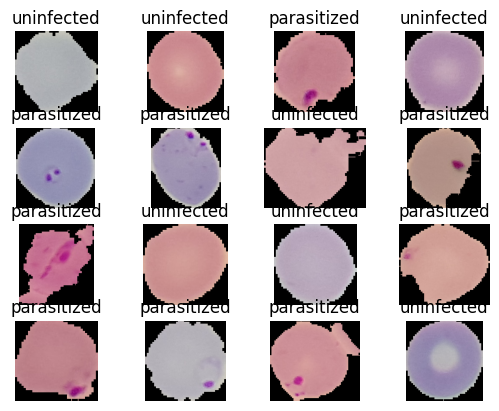

In [ ]:
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

**Data Preprocessing**

In [6]:
im_size = 224

def resize_rescale(image,label):
  return tf.image.resize(image, (im_size,im_size))/255.0 , label

In [7]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [ ]:
for image, label in train_dataset.take(1):
  print(image,label)


tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [8]:
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


**Sequential API**

In [ ]:
nmodel = tf.keras.Sequential([
    InputLayer(input_shape = (im_size,im_size,3)),
    Conv2D(filters = 6, kernel_size = 3, strides=1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters = 16, kernel_size = 3, strides=1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100,activation = "relu"),
    BatchNormalization(),
    Dense(10,activation = "relu"),
    BatchNormalization(),

    Dense(1,activation = "sigmoid"),

])

nmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_11 (Ba  (None, 222, 222, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_12 (Ba  (None, 109, 109, 16)      64        
 tchNormalization)                                               
                                                      

In [ ]:
nmodel.compile(optimizer = Adam(learning_rate = 0.001),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [ ]:
history = nmodel.fit(train_dataset,validation_data = val_dataset, epochs = 10, verbose = 1)

Epoch 1/10
689/689 [==============================] - 44s 59ms/step - loss: 0.6553 - accuracy: 0.6101 - val_loss: 1.1625 - val_accuracy: 0.5027
Epoch 2/10
689/689 [==============================] - 47s 67ms/step - loss: 0.3973 - accuracy: 0.8152 - val_loss: 0.2685 - val_accuracy: 0.9016
Epoch 3/10
689/689 [==============================] - 40s 58ms/step - loss: 0.2944 - accuracy: 0.8779 - val_loss: 0.7872 - val_accuracy: 0.8276
Epoch 4/10
689/689 [==============================] - 41s 59ms/step - loss: 0.1935 - accuracy: 0.9307 - val_loss: 0.1703 - val_accuracy: 0.9426
Epoch 5/10
689/689 [==============================] - 42s 61ms/step - loss: 0.1588 - accuracy: 0.9417 - val_loss: 0.4527 - val_accuracy: 0.6817
Epoch 6/10
689/689 [==============================] - 41s 60ms/step - loss: 0.1290 - accuracy: 0.9524 - val_loss: 0.1682 - val_accuracy: 0.9437
Epoch 7/10
689/689 [==============================] - 42s 61ms/step - loss: 0.1053 - accuracy: 0.9622 - val_loss: 0.1947 - val_accuracy:

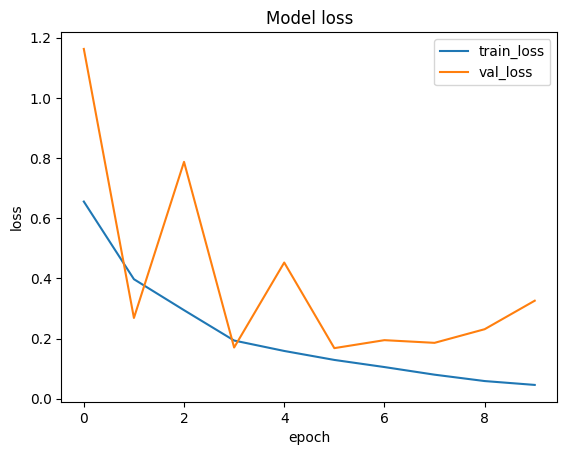

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

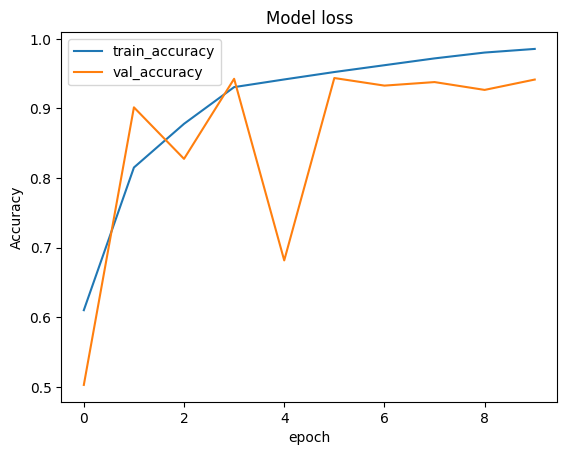

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

**Model Evaluation and Testing**

In [ ]:
test_dataset = test_dataset.batch(1)

In [ ]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
nmodel.evaluate(test_dataset)

2757/2757 [==============================] - 21s 3ms/step - loss: 0.4176 - accuracy: 0.9224


[0.4176179766654968, 0.9223793745040894]

In [ ]:
nmodel.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 11s 11s/step


0.99999726

In [ ]:
def parasite_or_not(x):
  if(x < 0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 18ms/step


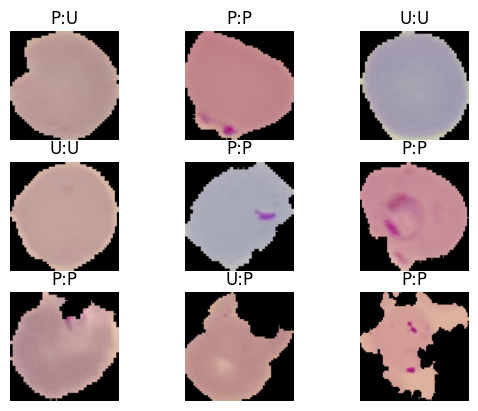

In [ ]:
for i , (image,label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ':' + str(parasite_or_not(nmodel.predict(image)[0][0])))

  plt.axis('off')

In [ ]:
nmodel.save('/content/drive/MyDrive/malaria_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Functional API**

In [16]:
func_input = Input(shape = (im_size,im_size,3),name = "Input_Image")
x = Conv2D(filters = 6, kernel_size = 3, strides=1, padding = 'valid', activation = 'relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides = 2)(x)
x = Conv2D(filters = 16, kernel_size = 3, strides=1, padding = 'valid', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides = 2)(x)
x = Flatten()(x)
x = Dense(100,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dense(10,activation = "relu")(x)
x = BatchNormalization()(x)
func_output = Dense(1,activation = "sigmoid")(x)

lenet_model = Model(func_input,func_output,name = "Lenet_Model")
lenet_model.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_8 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_9 (Bat  (None, 109, 109, 16)      

In [17]:
lenet_model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [18]:
history = lenet_model.fit(train_dataset,validation_data = val_dataset, epochs = 10, verbose = 1)

Epoch 1/10
689/689 [==============================] - 58s 74ms/step - loss: 0.4326 - accuracy: 0.7980 - val_loss: 0.3447 - val_accuracy: 0.8581
Epoch 2/10
689/689 [==============================] - 51s 73ms/step - loss: 0.2121 - accuracy: 0.9232 - val_loss: 0.1921 - val_accuracy: 0.9376
Epoch 3/10
689/689 [==============================] - 43s 63ms/step - loss: 0.1675 - accuracy: 0.9398 - val_loss: 0.1724 - val_accuracy: 0.9445
Epoch 4/10
689/689 [==============================] - 44s 64ms/step - loss: 0.1351 - accuracy: 0.9513 - val_loss: 0.1762 - val_accuracy: 0.9376
Epoch 5/10
689/689 [==============================] - 42s 61ms/step - loss: 0.1069 - accuracy: 0.9603 - val_loss: 0.2678 - val_accuracy: 0.9238
Epoch 6/10
689/689 [==============================] - 51s 74ms/step - loss: 0.0766 - accuracy: 0.9719 - val_loss: 0.4350 - val_accuracy: 0.8966
Epoch 7/10
689/689 [==============================] - 43s 62ms/step - loss: 0.0620 - accuracy: 0.9780 - val_loss: 0.3115 - val_accuracy:

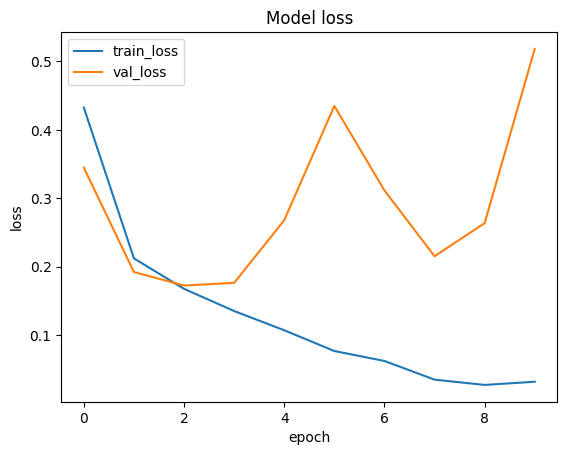

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

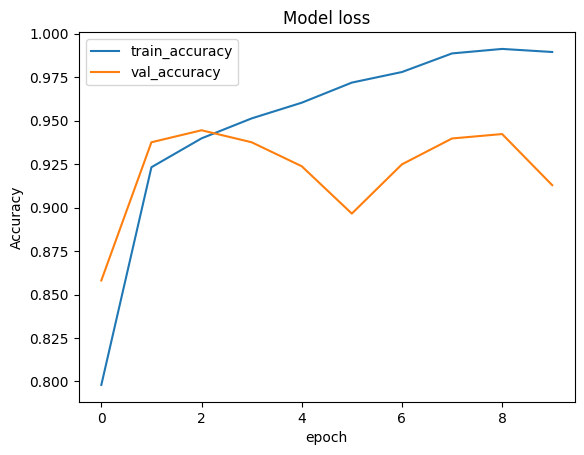

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [ ]:
nmodel = tf.keras.Sequential([
    InputLayer(input_shape = (im_size,im_size,3)),
    Conv2D(filters = 6, kernel_size = 3, strides=1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters = 16, kernel_size = 3, strides=1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100,activation = "relu"),
    BatchNormalization(),
    Dense(10,activation = "relu"),
    BatchNormalization(),

    Dense(1,activation = "sigmoid")

])

nmodel.summary()